In [10]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import dynesty
from dynesty import plotting as dyplot
import pickle
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats

# Estimate SD on 1d Gaussian

In [22]:
truth = 3
data = np.random.normal(loc=0, scale=truth, size=500)

In [37]:

def ln_prob(est):
    return np.sum(scipy.stats.norm(loc=0, scale=est).logpdf(data))

def prior_transform(u):
    return u* np.exp(2)

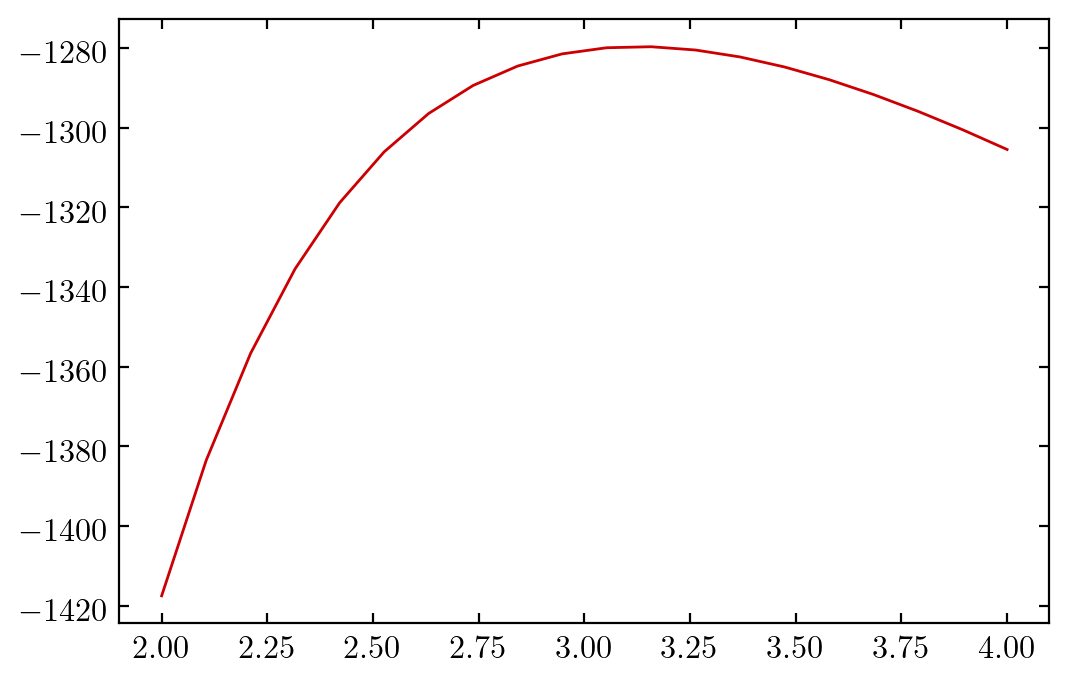

In [38]:
inp = np.linspace(2, 4, num=20)
_, ax = plt.subplots()
ax.plot(inp, [ln_prob(i) for i in inp])

In [39]:
sampler = dynesty.NestedSampler(ln_prob, prior_transform, ndim=1, nlive=1000)

In [40]:
sampler.run_nested()

iter: 3725 | +1000 | bound: 1 | nc: 1 | ncall: 35584 | eff(%): 13.278 | loglstar:   -inf < -1279.648 <    inf | logz: -1282.996 +/-  0.042 | dlogz:  0.001 >  1.009                                   

[-1.16719816e+07 -5.14342844e+06 -1.69789086e+06 ... -1.28299787e+03 -1.28299718e+03 -1.28299649e+03]


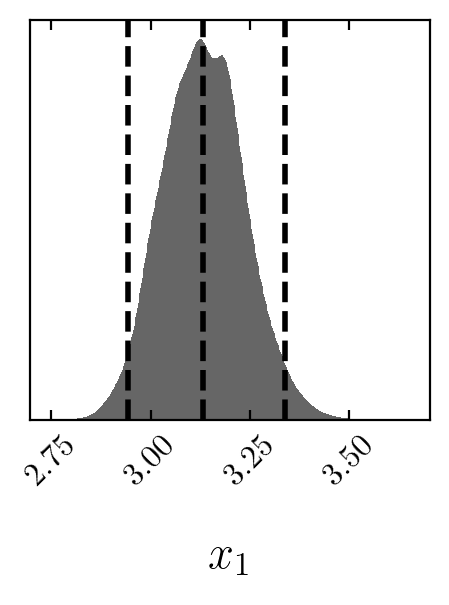

In [41]:
dyplot.cornerplot(sampler.results)
print(sampler.results.logz)
# Prior range of 2.5-3.5: logz = -1281.03070946
# Prior range of 2-4: logz = -1281.77199389 # The 0.7 decrease is roughly ln(2) = 0.69
# Prior range of 0-e^2: logz = -1282.99649 # Roughly an decrease of 2